## User Engagement Analysis

In [6]:
import os
import sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [8]:
# Load the cleaned xdr data into a DataFrame
data = pd.read_csv('../Data/data/xdr_cleaned.csv', index_col=0)


In [9]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,4/25/2019 14:35,662.0,241983.25,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.00,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,4/25/2019 8:15,606.0,241983.25,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.00,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,49.0,4/25/2019 11:58,652.0,241983.25,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,833230.75,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,4/25/2019 7:36,171.0,241983.25,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1101487.5,799538153.0,10849722.00,749039933.0,12797283.0,43324218.0,834328852.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,4/25/2019 10:40,947.0,241983.25,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,1101487.5,527707248.0,3529801.00,550709500.0,13910322.0,38542814.0,569138589.0


In [14]:
from user_engagement_analysis import UserEngagementAnalysis
# Create an instance of the class
analysis = UserEngagementAnalysis(data)

# Define application traffic columns
applications = {
    'YouTube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}
# Initialize the analysis class
analysis = UserEngagementAnalysis(data)

# Aggregate metrics
analysis.aggregate_metrics()
analysis.metrics.head()



,MSISDN/Number,total_session_duration,total_download_traffic,total_upload_traffic,sessions_frequency
0,3.361370e+10,7.361193e+08,3.363551e+12,3.045255e+11,7418
1,3.361370e+10,5.264600e+04,7.300408e+08,8.586766e+07,2
2,3.361370e+10,6.574900e+04,1.489660e+09,7.713169e+07,2
3,3.361370e+10,1.312920e+05,7.455622e+07,5.645270e+07,1
4,3.361370e+10,2.419832e+05,4.891984e+08,3.382247e+07,1


In [15]:
# Report top customers
top_customers = analysis.report_top_customers()
print("Top 10 Customers by Sessions Frequency:", top_customers[0])
print("Top 10 Customers by Session Duration:", top_customers[1])
print("Top 10 Customers by Download Traffic:", top_customers[2])
print("Top 10 Customers by Upload Traffic:", top_customers[3])



Top 10 Customers by Sessions Frequency:        MSISDN/Number  total_session_duration  total_download_traffic  \
0       3.361370e+10            7.361193e+08            3.363551e+12   
95260   3.376819e+10            7.303022e+08            3.364043e+12   
7819    3.362632e+10            3.963598e+06            7.287455e+09   
762     3.361489e+10            3.856576e+06            8.091124e+09   
7475    3.362578e+10            4.088400e+06            7.724782e+09   
31235   3.365973e+10            3.461320e+06            7.092379e+09   
70367   3.367588e+10            3.300974e+06            7.308813e+09   
86854   3.376054e+10            3.362511e+06            7.851057e+09   
59193   3.366716e+10            3.076714e+06            5.087758e+09   
8286    3.362708e+10            2.751182e+06            5.309479e+09   

       total_upload_traffic  sessions_frequency  
0              3.045255e+11                7418  
95260          3.041065e+11                7418  
7819           6.

In [16]:
# Normalize and cluster
analysis.normalize_and_cluster(n_clusters=3)
print(analysis.metrics.head())



   MSISDN/Number  total_session_duration  total_download_traffic  \
0   3.361370e+10            7.361193e+08            3.363551e+12   
1   3.361370e+10            5.264600e+04            7.300408e+08   
2   3.361370e+10            6.574900e+04            1.489660e+09   
3   3.361370e+10            1.312920e+05            7.455622e+07   
4   3.361370e+10            2.419832e+05            4.891984e+08   

   total_upload_traffic  sessions_frequency  cluster  
0          3.045255e+11                7418        1  
1          8.586766e+07                   2        0  
2          7.713169e+07                   2        0  
3          5.645270e+07                   1        0  
4          3.382247e+07                   1        0  


In [18]:
# Cluster summary
cluster_summary = analysis.cluster_summary()
cluster_summary



cluster sessions_frequency                             \
                         min   max         mean     sum   
0       0                  1     3     1.209794  105188   
1       1               7418  7418  7418.000000   14836   
2       2                  2    18     3.407363   28322   

  total_session_duration                                            \
                     min           max          mean           sum   
0                20262.0  4.810292e+05  1.142542e+05  9.934063e+09   
1            730302182.0  7.361193e+08  7.332107e+08  1.466421e+09   
2                60786.0  4.088400e+06  4.161342e+05  3.458908e+09   

  total_download_traffic                                            \
                     min           max          mean           sum   
0           7.455622e+07  1.992887e+09  5.443384e+08  4.732859e+13   
1           3.363551e+12  3.364043e+12  3.363797e+12  6.727594e+12   
2           2.240812e+08  8.091124e+09  1.611813e+09  1.339739e+13   

  total_upload_traffic                                            
                   min           max          mean           sum  
0         2.244628e+07  1.646634e+08  4.967638e+07  4.319212e+12  
1         3.041065e+11  3.045255e+11  3.043160e+11  6.086320e+11  
2         4.489257e+07  7.248050e+08  1.409723e+08  1.171761e+12

In [19]:
# Aggregate traffic per application
app_total_traffic, top_10_engaged_per_app = analysis.aggregate_traffic_per_application(applications=applications)
print("Total Traffic per Application:", app_total_traffic)
print("Top 10 Engaged Users per Application:", top_10_engaged_per_app)



Total Traffic per Application:   application  download_bytes  upload_bytes   total_bytes
0      Gaming    6.261886e+13  1.229855e+12  6.384872e+13
1     Netflix    1.724772e+12  1.632068e+12  3.356840e+12
2       Other    6.247781e+13  1.225735e+12  6.370355e+13
3     YouTube    1.725886e+12  1.633035e+12  3.358921e+12
Top 10 Engaged Users per Application:           MSISDN  download_bytes  upload_bytes application   total_bytes
0   3.361370e+10    3.122603e+12  6.101169e+10      Gaming  3.183615e+12
1   3.376819e+10    3.121426e+12  6.152340e+10      Gaming  3.182950e+12
2   3.361489e+10    7.573008e+09  1.272493e+08      Gaming  7.700257e+09
3   3.376054e+10    7.350510e+09  1.441438e+08      Gaming  7.494654e+09
4   3.362578e+10    7.144608e+09  1.533882e+08      Gaming  7.297996e+09
5   3.367588e+10    6.863307e+09  1.074453e+08      Gaming  6.970752e+09
6   3.362632e+10    6.726535e+09  1.423192e+08      Gaming  6.868855e+09
7   3.365973e+10    6.611019e+09  1.157518e+08      Gamin

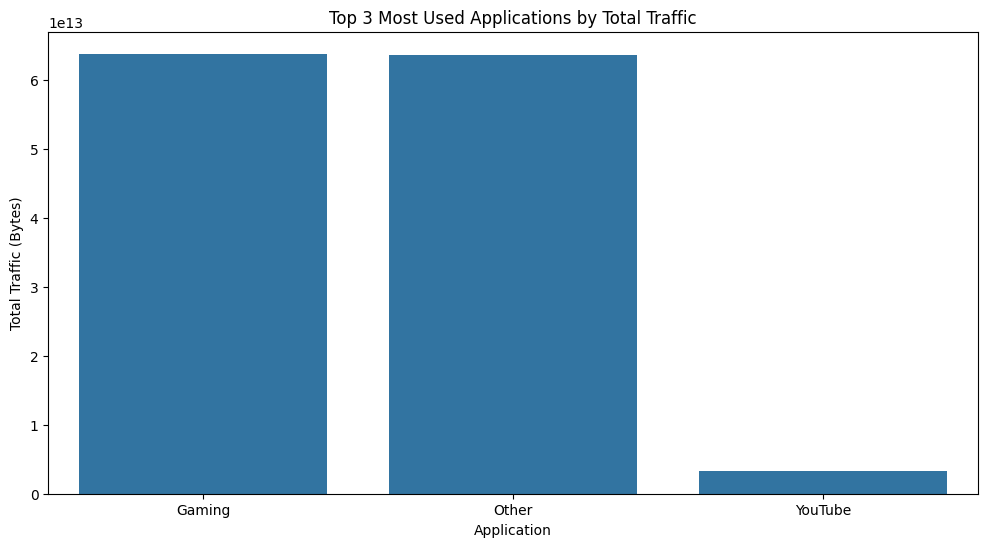

In [23]:
# Plot top applications 
top_3_apps = app_total_traffic.nlargest(3, 'total_bytes')
analysis.plot_top_applications(top_3_apps)


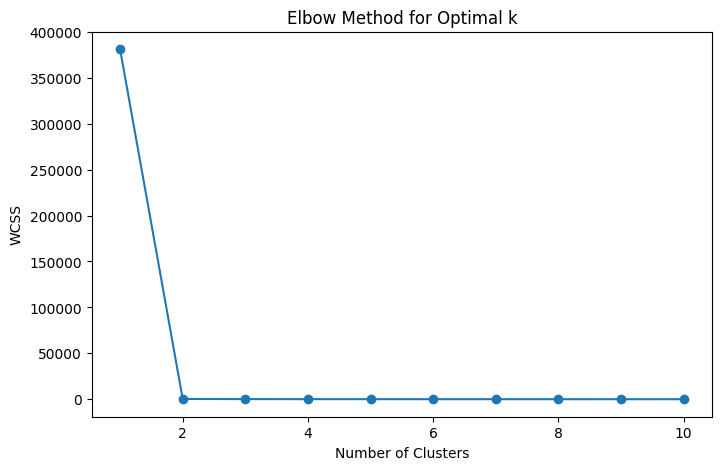

In [24]:
# Elbow method for determining optimal number of clusters
analysis.elbow_method()